In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('earthquake_data.csv')

In [ ]:
data.columns
data2=data
data2.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [ ]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [ ]:
data=data[['Date','Time','Latitude','Longitude','Depth','Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


Scaling date and time

In [ ]:
import datetime
import time

In [ ]:
timestamp=[]
for d,t in zip(data['Date'],data['Time']):
  try:
    ts=datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
    timestamp.append(time.mktime(ts.timetuple()))
  except ValueError:
    #print(ValueError)
    timestamp.append('ValueError')

timeStamp=pd.Series(timestamp)
data['TimeStamp']=timeStamp.values
data.head()

<ipython-input-31-e8b6665ecdc0>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Time,Latitude,Longitude,Depth,Magnitude,TimeStamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,-157630542.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,-157465811.0
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,-157355642.0
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,-157093817.0
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,-157026430.0


In [ ]:
final_data=data.drop(['Date','Time'],axis=1)
final_data=final_data[final_data.TimeStamp!='ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,TimeStamp,Class
0,19.246,145.616,131.6,6.0,-157630542.0,Strong
1,1.863,127.352,80.0,5.8,-157465811.0,Moderate
2,-20.579,-173.972,20.0,6.2,-157355642.0,Strong
3,-59.076,-23.557,15.0,5.8,-157093817.0,Moderate
4,11.938,126.427,15.0,5.8,-157026430.0,Moderate


# Visualizing the given dataset

In [ ]:
data.shape

(23412, 7)

Text(0, 0.5, 'Number of Occurences')

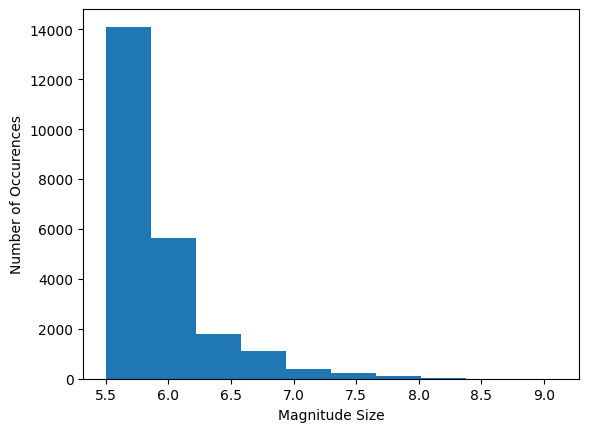

In [ ]:
plt.hist(data['Magnitude'])
plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurences')

In [ ]:
import seaborn as sns

 local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)


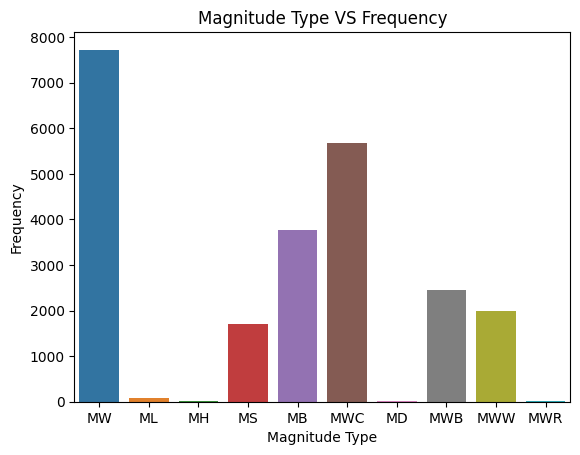

In [ ]:
sns.countplot(x="Magnitude Type", data=data2)
plt.ylabel('Frequency')
plt.title('Magnitude Type VS Frequency')
print(" local magnitude (ML), surface-wave magnitude (Ms), body-wave magnitude (Mb), moment magnitude (Mw)")

In [ ]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

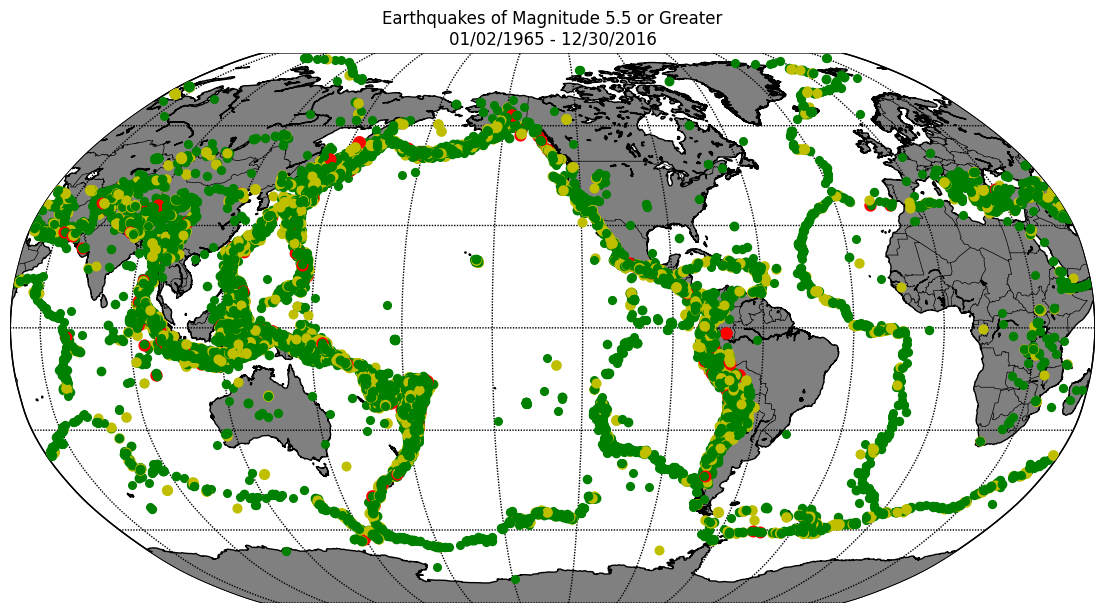

In [ ]:
def get_marker_color(magnitude):
    if magnitude < 6.2:
        return ('go')
    elif magnitude < 7.5:
        return ('yo')
    else:
        return ('ro')

plt.figure(figsize=(14,10))

eq_map = Basemap(projection='robin', resolution = 'l',
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
# read longitude, latitude and magnitude
lons = data2['Longitude'].values
lats = data2['Latitude'].values
magnitudes = data2['Magnitude'].values
timestrings = data2['Date'].tolist()
    
min_marker_size = 0.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag # * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)
    
title_string = "Earthquakes of Magnitude 5.5 or Greater\n"
title_string += "%s - %s" % (timestrings[0][:10], timestrings[-1][:10])
plt.title(title_string)

plt.show()

Text(0.5, 1.0, 'Number of Earthquakes In Each Year')

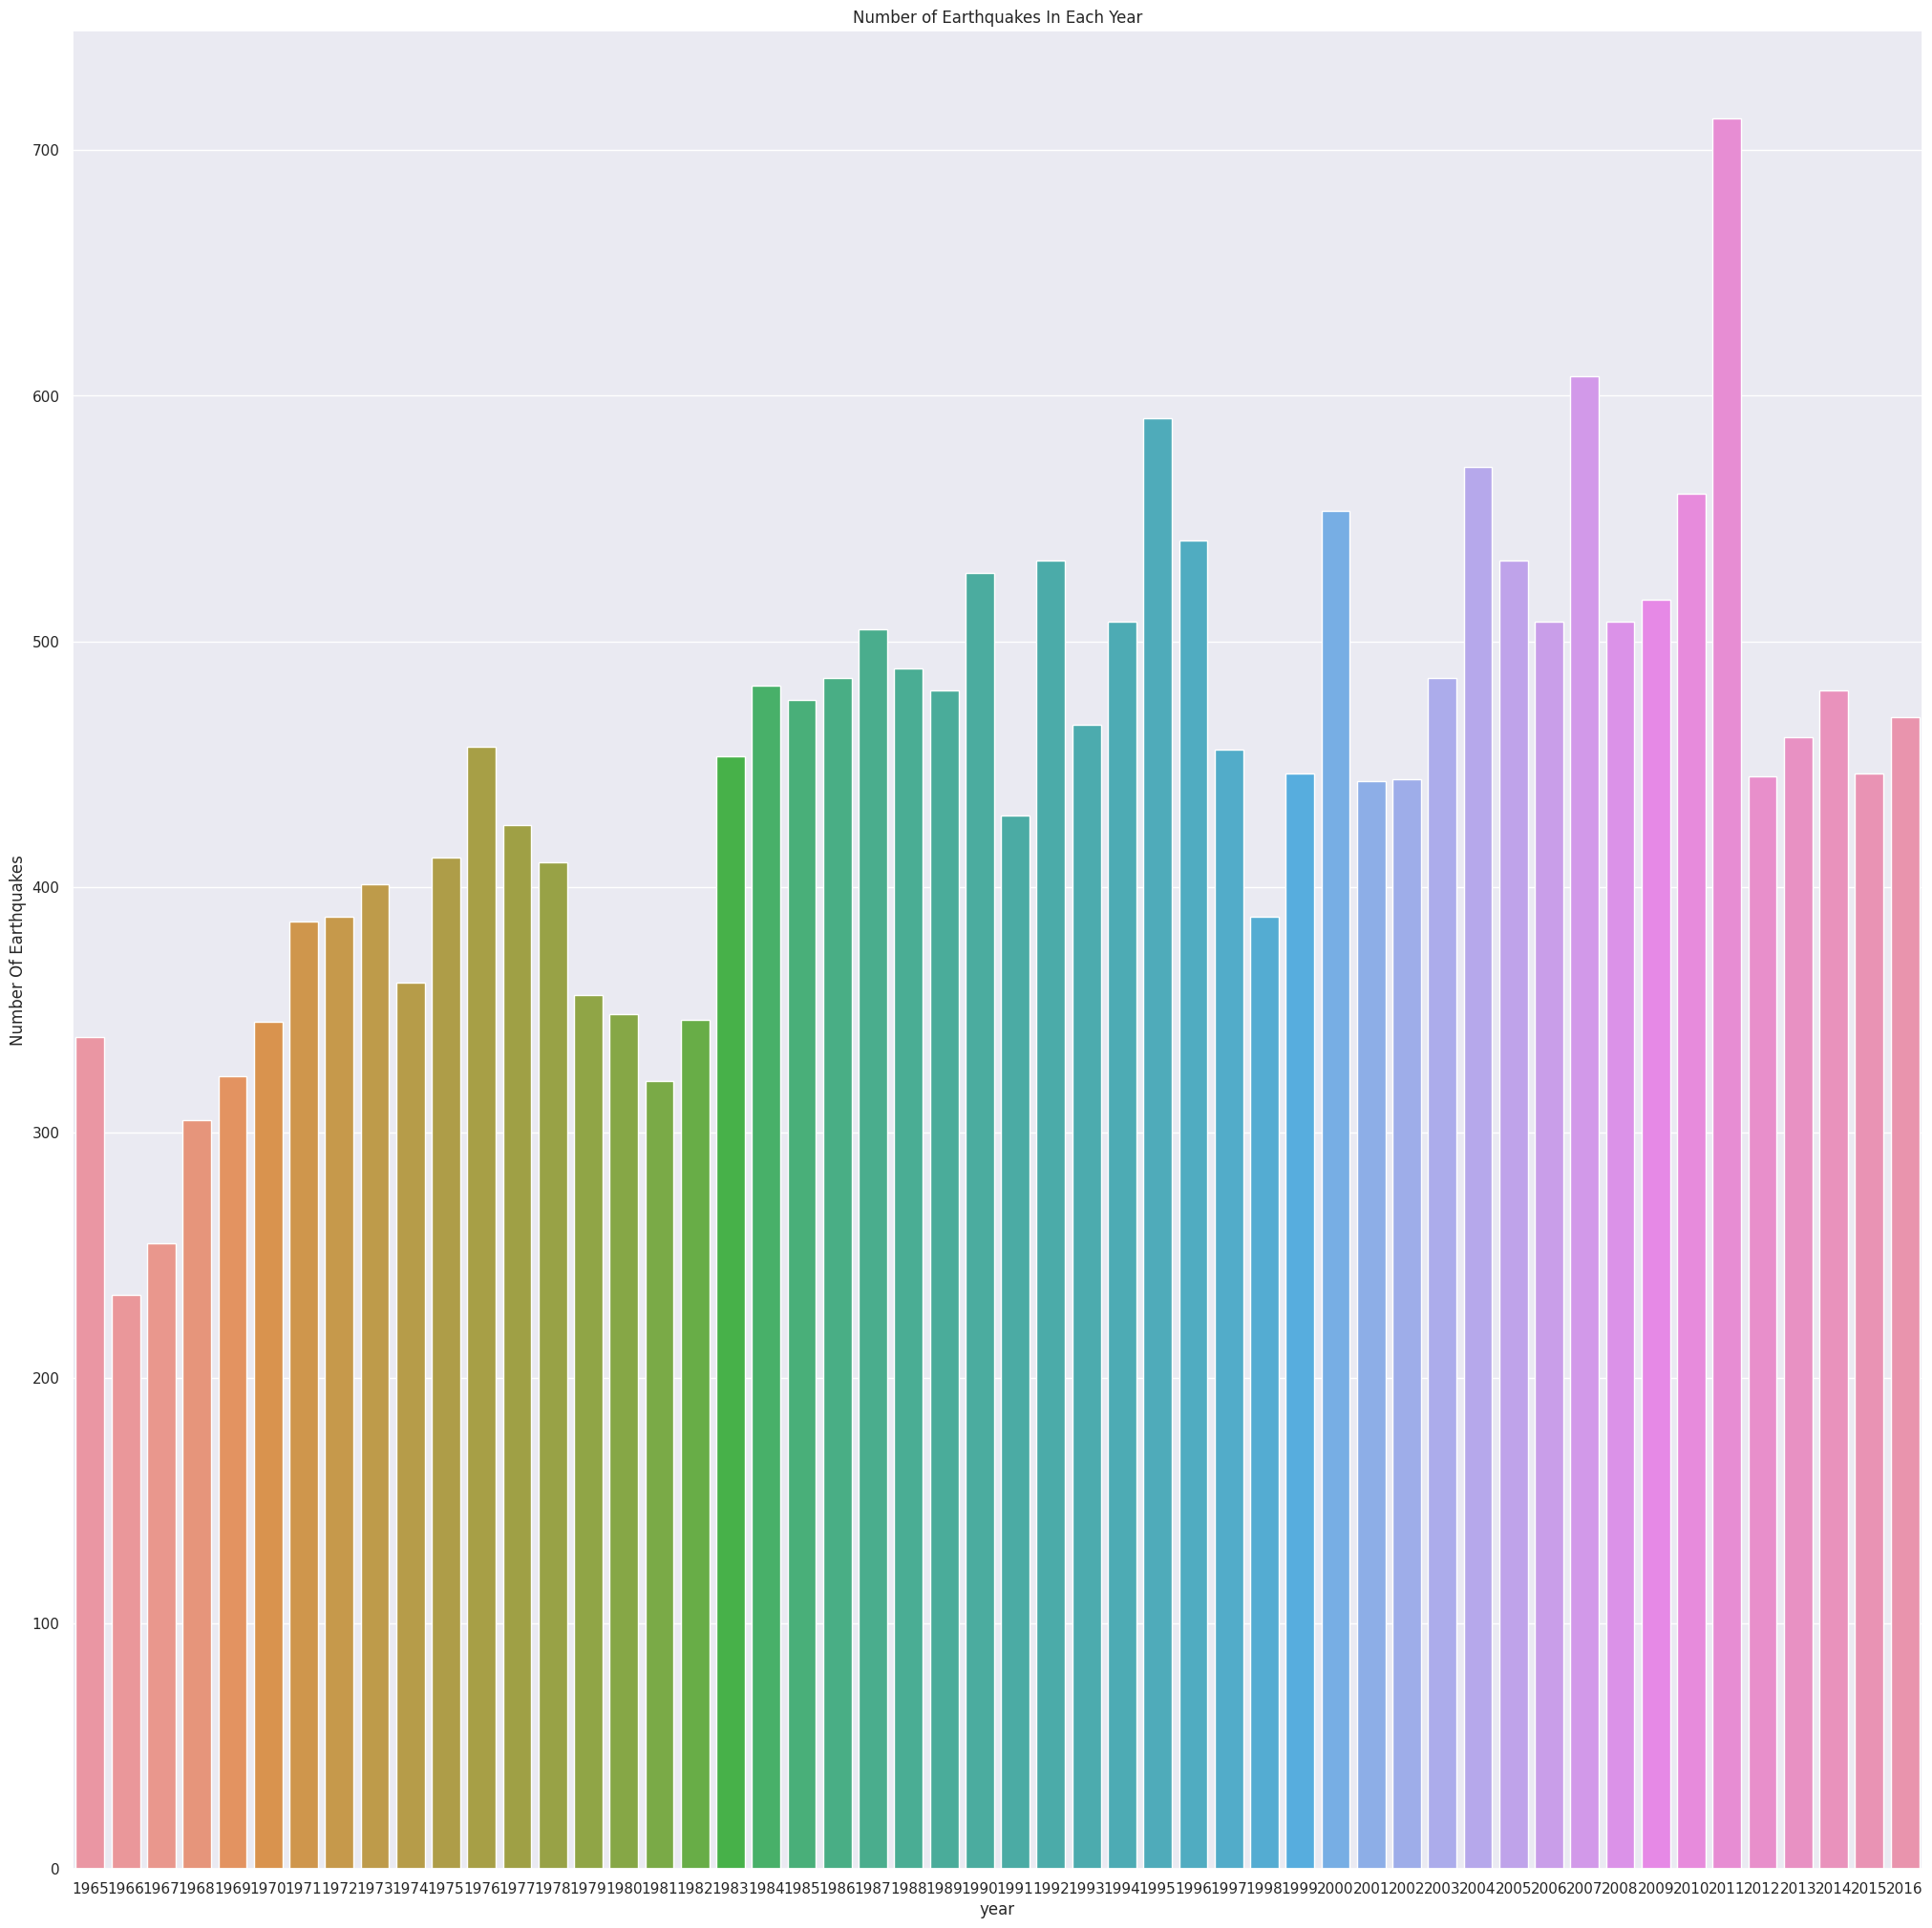

In [ ]:
plt.figure(figsize=(25,25))
data2['date'] = data2['Date'].apply(lambda x: pd.to_datetime(x))
data2['year'] = data2['date'].apply(lambda x: str(x).split('-')[0])
sns.set(font_scale=1.0)
sns.countplot(x="year", data=data2)
plt.ylabel('Number Of Earthquakes')
plt.title('Number of Earthquakes In Each Year')

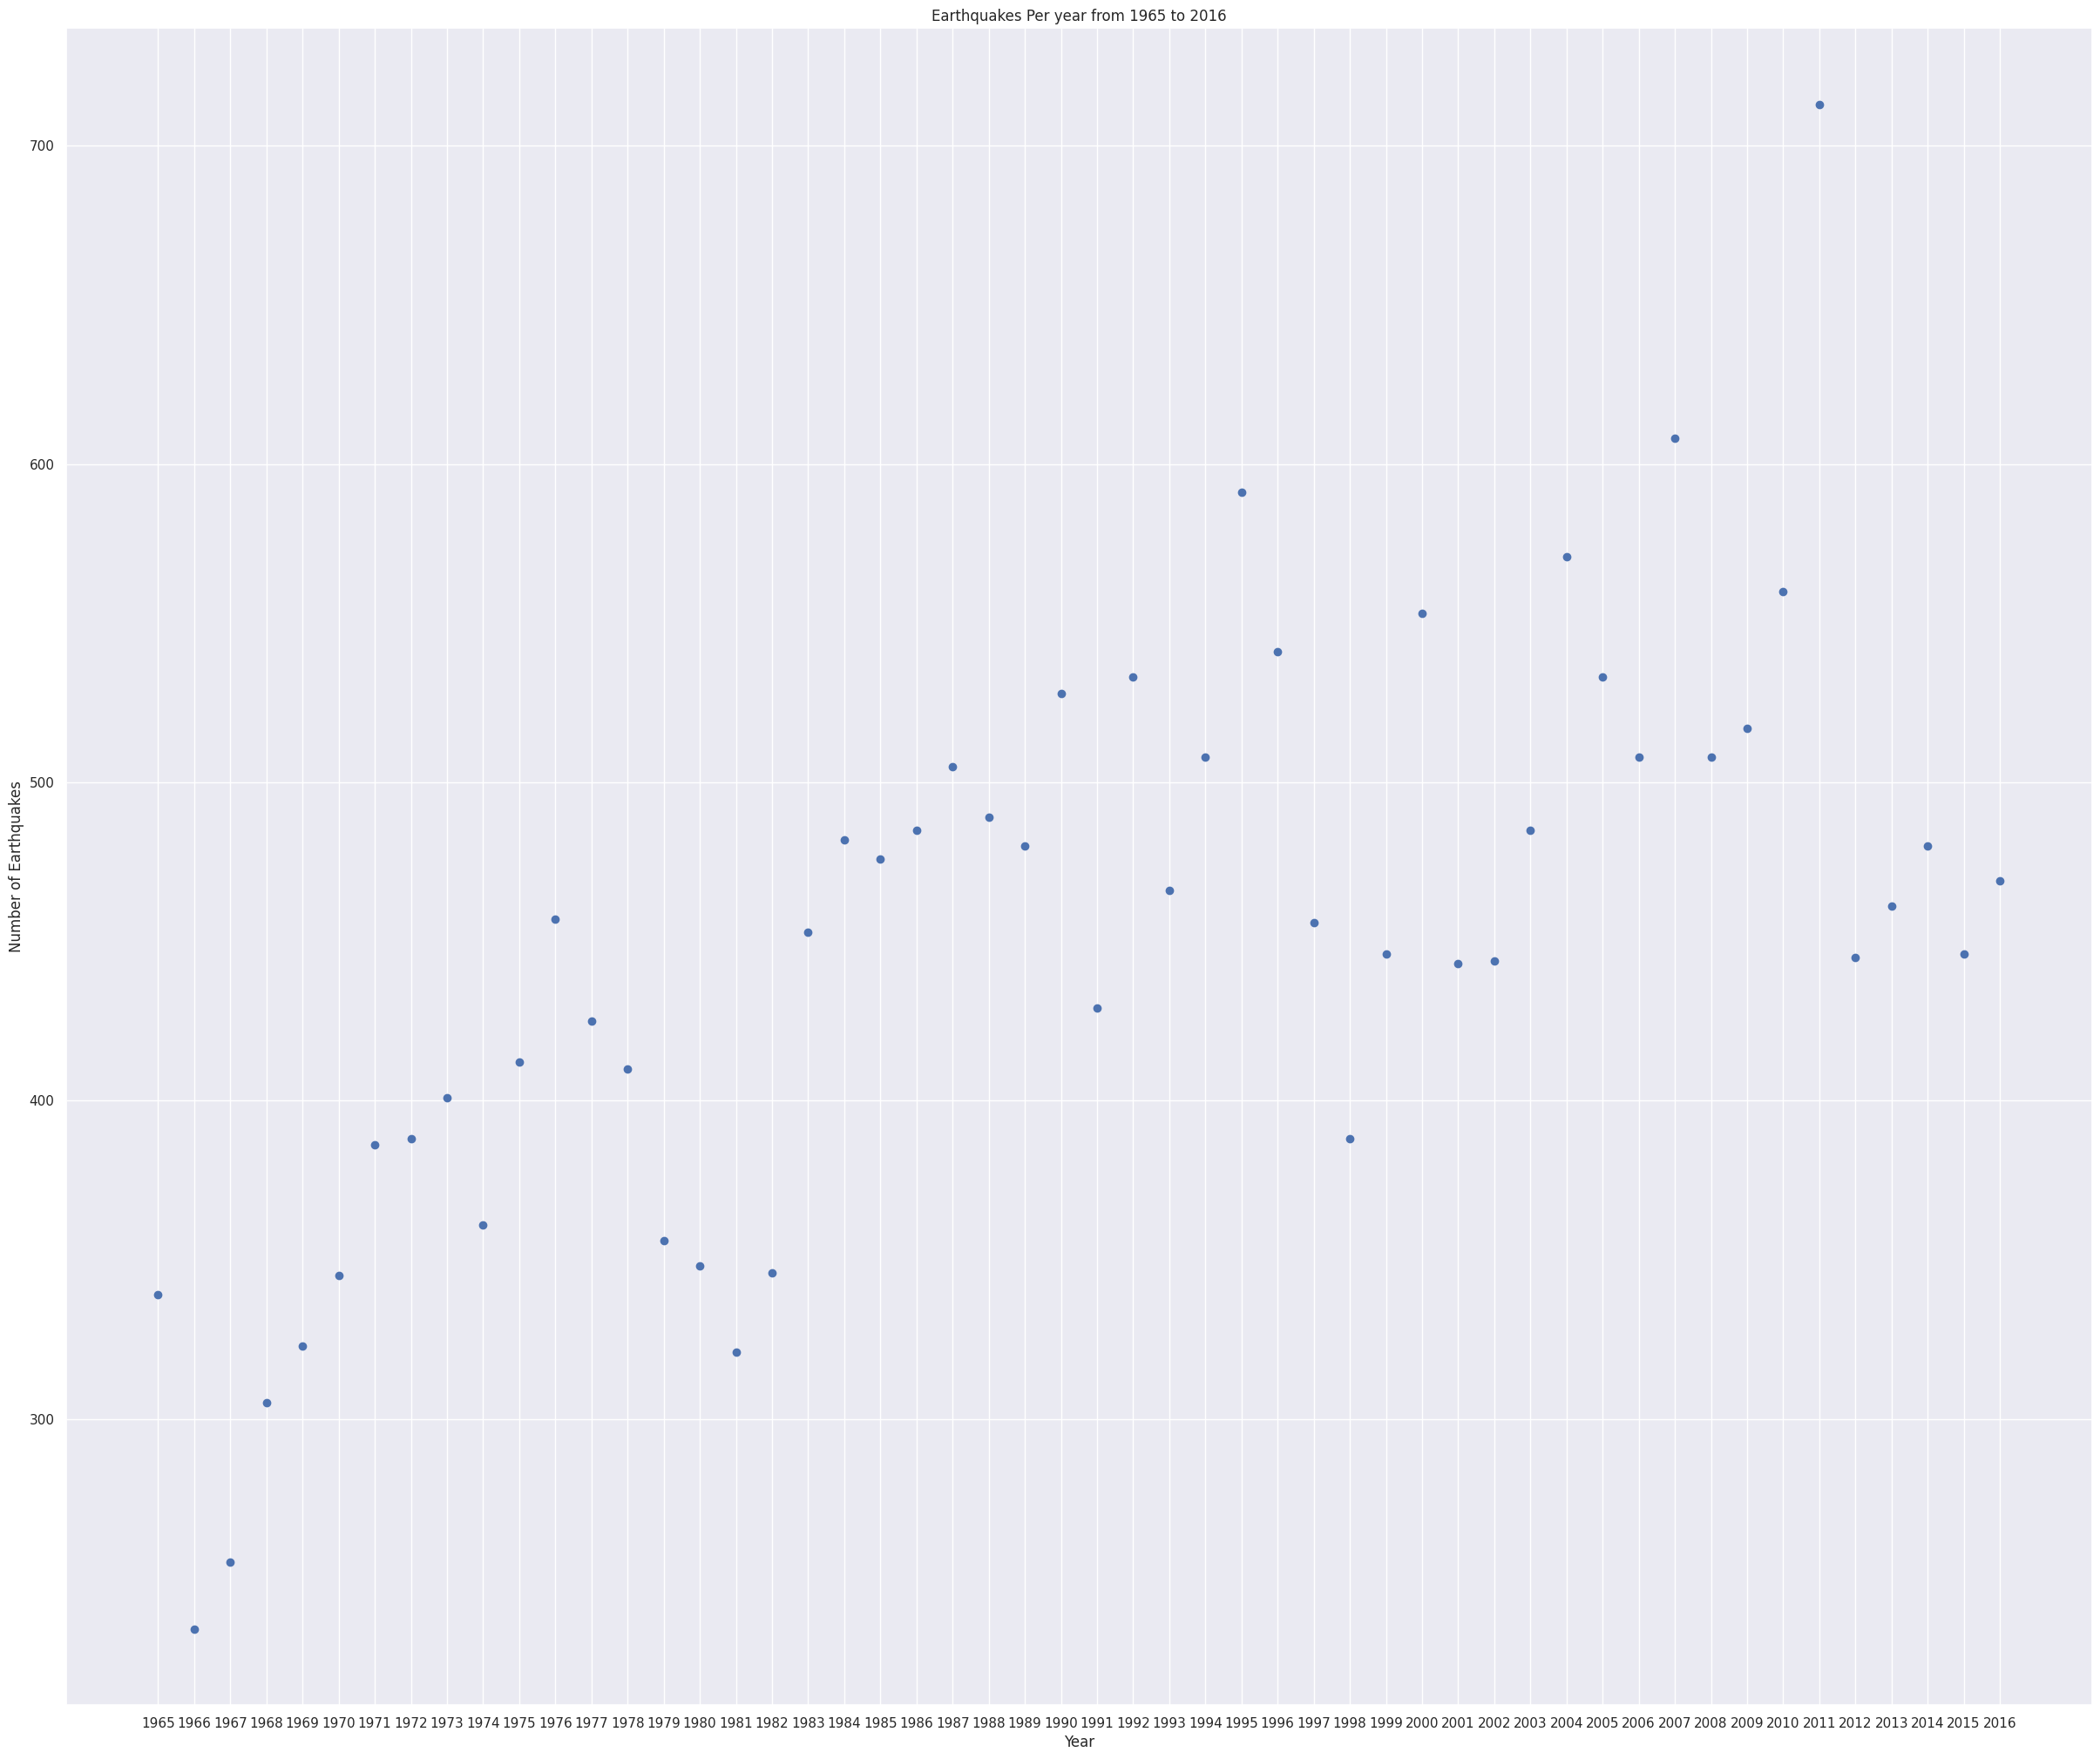

In [125]:
x = data2['year'].unique()
y = data2['year'].value_counts()

count = []
for i in range(len(x)):
    key = x[i]
    count.append(y[key])

plt.figure(figsize=(30,25))

plt.scatter(x, count)
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes Per year from 1965 to 2016')
plt.show()

# Magnitude Classes

Disastrous: M > =8

Major: 7 < =M < 7.9

Strong: 6 < = M < 6.9

Moderate: 5.5 < =M < 5.9

In [ ]:
data.loc[data['Magnitude'] >=8, 'Class'] = 'Disastrous'
data.loc[ (data['Magnitude'] >= 7) & (data['Magnitude'] < 7.9), 'Class'] = 'Major'
data.loc[ (data['Magnitude'] >= 6) & (data['Magnitude'] < 6.9), 'Class'] = 'Strong'
data.loc[ (data['Magnitude'] >= 5.5) & (data['Magnitude'] < 5.9), 'Class'] = 'Moderate'

<ipython-input-51-78e410965f2e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Magnitude Class VS Frequency')

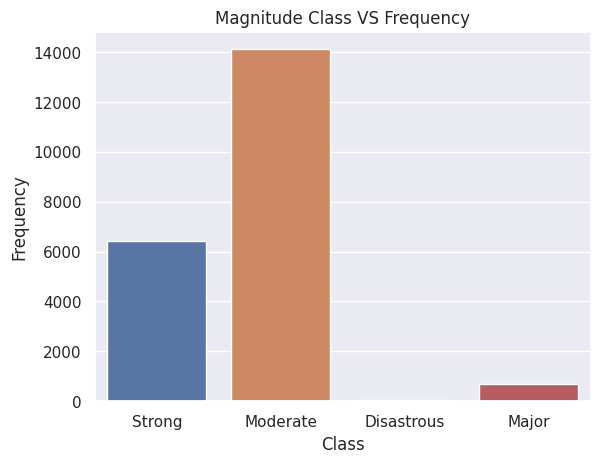

In [ ]:
sns.countplot(x="Class", data=data)
plt.ylabel('Frequency')
plt.title('Magnitude Class VS Frequency')

# Splitting data and Creating the Model

In [ ]:
X = final_data[['TimeStamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization,Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 3 dense layers, 16, 16, 2 nodes each

def create_model(neurons, activation, optimizer, loss):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(3,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {
    "neurons": [16], 
    "batch_size": [10, 20], 
    "epochs": [10],
    "activation": ['sigmoid', 'relu'],
    "optimizer": ['SGD', 'Adadelta'],
    "loss": ['squared_hinge']
}

<ipython-input-112-3b26f80c2616>:3: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
best_params

{'activation': 'sigmoid',
 'batch_size': 20,
 'epochs': 10,
 'loss': 'squared_hinge',
 'neurons': 16,
 'optimizer': 'Adadelta'}

In [115]:
print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))

Best: 0.800961 using {'activation': 'sigmoid', 'batch_size': 20, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}


In [116]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.587397 (0.480159) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.200000 (0.400000) with: {'activation': 'sigmoid', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.400000 (0.489898) with: {'activation': 'sigmoid', 'batch_size': 20, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.800961 (0.367380) with: {'activation': 'sigmoid', 'batch_size': 20, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.762780 (0.382163) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'SGD'}
0.587613 (0.480317) with: {'activation': 'relu', 'batch_size': 10, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optimizer': 'Adadelta'}
0.601011 (0.466516) with: {'activation': 'relu', 'batch_size': 20, 'epochs': 10, 'loss': 'squared_hinge', 'neurons': 16, 'optim

In [118]:
model= Sequential()

model.add(Dense(16,activation='sigmoid',input_shape=(3,)))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='Adadelta',loss='squared_hinge',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(X_test,y_test))

[test_loss,test_acc]=model.evaluate(X_test,y_test)

Epoch 1/10
937/937 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 2/10
937/937 [==============================] - 2s 3ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 3/10
937/937 [==============================] - 3s 3ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 4/10
937/937 [==============================] - 4s 5ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 5/10
937/937 [==============================] - 3s 3ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 6/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 7/10
937/937 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9197 - val_loss: 0.0041 - val_accuracy: 0.9182
Epoch 

In [119]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.004063417669385672, accuracy = 0.9181973338127136
